# Finite Differences

<p align=justify>
The Finite Differences method enables the approximation of a differential by the ratio of the differences between a function in two different domain points and the points themselves. This is done by taking advantage of Taylor's series expansion of a function locally (around a given point of differentiation).
</p>

## Taylor's Series Expansion

A given function $f$ defined in $R \rightarrow R$ can be approximated by the following McLaurin's series expansion (which is just a fancy name for a Taylor's series expansion for a function around $x=0$):

$$ f(x + \delta) = f(x) + \delta f'(x) + \frac{\delta ^2}{2} f''(x) + ... + \frac{\delta ^n}{(n-1)!}\frac{d}{dx}f(x)$$

A possible first order approximation for $f(x)$ can be given by :

$$f(x+\delta) \approx f(x) + \delta f'(x) + E(\delta^2)$$

Which leads to the first order Finite Difference approximation of $f'(x)$:

Eq 1 : $$ f'(x) \approx \frac{f(x+\delta) - f(x)}{\delta} - E(\delta^2)$$



Where $E(\delta^2)$ is the second-order error inherent to the first-order Taylor's series approximation of $f(x)$.

## Maxwell Equations


Maxwell's equations are usually presented and used in differential form. It is only natual to use the Finite Differences method to solve them computationally. To do so, we need to define our Problem, define the geometry or Surface of our problem and then discretize this Surface into smaller cells, forming a cell grid. Each point defining the boundaries of each cell of the grid will be a possible point to be used in the Finite Differences method.

However, when the wavelength of the electromagnetic waves inherent to the problem fall sorther than the length of four grid cells, using the first-order approximation shown in Eq.1 is not remotely accurate. 



## Staggered Grids method

Another possible approximation is the "Staggered Grids" method to use the first-order approximation to apply the Finite Diff. method to compute the "half-grid" 
$$ x_{i+\frac{1}{2}} = x_i + \frac{h}{2}$$

Eq 2 : $$f'\left(x+\frac{h}{2}\right) = \frac{f(x+h) - f(x)}{h}- E(h^2)$$

## Second Derivative

Applying Eq.2 recursively leads ot the second derivative approximation of $f(x)$ using the Finite Differences method:

$$ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} - E(h^2)$$

## 2D Capacitance Extraction

In the vaccum region between the inner and outer conductors of the coaxial cable represented in the matplotlib image below, the electrostatic potential $\phi$ is constant through each conductor, and has a spatial variation inbetween the conductors.

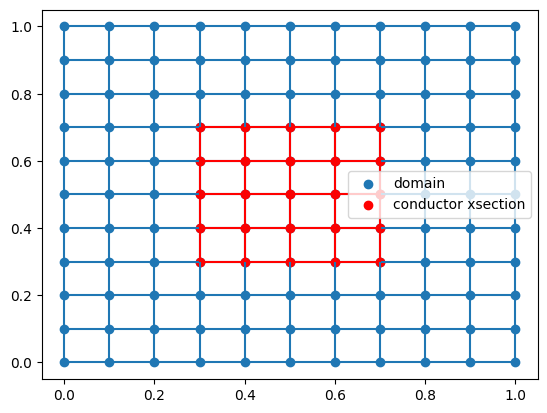

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

domain_bb = ((0,0),(1,1))
domain_np = (11,11)

x, y = np.meshgrid(
    np.linspace(
        domain_bb[0][0], 
        domain_bb[1][0], 
        domain_np[0]
    ), 
    np.linspace(
        domain_bb[0][1], 
        domain_bb[1][1], 
        domain_np[1]
    )
)

cond_bb = ((0.3,0.3),(0.7,0.7))
cond_np = (5,5)

xcond, ycond = np.meshgrid(
    np.linspace(
        cond_bb[0][0], 
        cond_bb[1][0], 
        cond_np[0]
    ), 
    np.linspace(
        cond_bb[0][1], 
        cond_bb[1][1], 
        cond_np[1]
    )
)



Considering the special electrostatics case of Faraday's Law $\phi$:

$$ \nabla \times \vec{E} = 0 $$

And considering also the relationship between the electric field and electric potential ($\phi$):

$$ \vec{E} = -\nabla \phi$$


We have the following electrostatics equation:

$$ \nabla \times (-\nabla \cdot \phi) = 0$$

Which can be rewritten as Laplace's equation (governing the coaxial cable):

$$ \nabla^2 \phi = 0$$

Let us now assume the geometry of the Problem can be fitted on a grid of squares so that we can apply the Finite Differences method to solve the Laplace's equation.

---
### Important Note:

Considering discretization cell geometries other than squares is possible, but are more suited to other methods such as the more general Finite Elements method must be used. Nonetheless, Finite Differences method can also be used with square cells of different sizes, providing a method of refining the grid in regions of interest.

---

### Problem Definition

Using a square grid we have that the $x$ and $y$ coordinates of each cell can be defined using a linear space:

$$ x_i = x_0 + ih_x$$
$$ y_j = y_0 + jh_y$$

Where $h_x$ and $h_y$ are the grid spacing in the $x$ and $y$ directions, respectively.

In this case, and considering $h_y = h_x$, the discretized Laplace's equation can be written as:

Eq 3: $$ \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} \approx \frac{\phi_{i-1,j} + \phi_{i+1,j} + \phi_{i,j-1} + \phi_{i,j+1} - 4\phi_{i,j}}{h^2} = 0$$

### Jacobi Iteration

Eq. 3 magically states that the electric potential at a given point (in the iteration n+1) is the average of the electric potential of the four points surrounding it (computed in the previous n-th iteration). This method is known as the Jacobi iteration method, and it converges rather slowly.

Eq 4: $$\phi_{i,j}^{n+1} = \frac{1}{4}\left( \phi_{i-1,j}^n + \phi_{i+1,j}^n + \phi_{i,j-1}^n + \phi_{i,j+1}^n \right)$$

### Gauss-Seidel Iteration

A possible improvement to the Jacobi iteration method is the Gauss-Seidel iteration method, which uses the newly computed electric potential of the points surrounding the point of interest in the same iteration. This method converges faster than the Jacobi iteration method. A further improvement ot this method also introduces an overrelaxation factor $R$, which for $R>1$ can lead to faster convergence. The method proves unstable for $R>2$.

Eq 5: $$\phi_{i,j}^{n+1} = \phi_{i,j}^n + R\left( \frac{\phi_{i-1,j}^{n+1} + \phi_{i+1,j}^n + \phi_{i,j-1}^{n+1} + \phi_{i,j+1}^n}{4} - \phi_{i,j}^n\right)$$

An euristic estimate for the optimal value of $R$ is given by: 

$$ R_{opt} = 2 - \frac{\pi}{m}$$

Where $m$ is the number of grid points in the $x$ or $y$ direction.

### Boundary Conditions

As boundary conditions we can assume that the central conductor of the coaxial cable is at a constant potential of $\phi_1 = 1 V$ and the outter conductor shell is at a constant potential of $\phi_2 = 0 V$. 

These boundary conditions enable the computation of the charge ($Q$) per unit length, which can be used to compute the capacitance per unit length ($C$) of the coaxial cable:

$$ Q_z = \epsilon_0 \oint \vec{E} \cdot \vec{n_z}dl = -\epsilon_0 \oint \frac{\partial \phi}{\partial z}dl \rightarrow$$

$$\rightarrow Q_z = -\epsilon_0\frac{\partial }{\partial z} \oint \phi \hspace{0.1cm}dl \hspace{0.5cm} [C/m]$$

$$ C = Q / V$$

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
def gauss_seidel(f, mask, n, m):
    """Compute a single iteration of the Gauss Seidel method"""
    # Create slices to access neighboring elements
    f = f.copy()
    
    for i in range(1, n-1):
        for j in range(1, m-1):
            f[i,j] = f[i,j] + (0.25*(f[i-1,j] + f[i+1,j] + f[i,j-1] + f[i,j+1]) - f[i,j])*mask[i,j]
    # symmetry on the left boundary i-1 -> i+1
    i = 0
    for j in range(1, m-1):
        f[i,j] = f[i,j] + (0.25*(f[i-1,j] + f[i+1,j] + f[i,j-1] + f[i,j+1]) - f[i,j])*mask[i,j]
    # symmetry on the lower boundary j-1 -> j+1
    j = 0
    for i in range(1, n-1):
        f[i,j] = f[i,j] + (0.25*(f[i-1,j] + f[i+1,j] + f[i,j-1] + f[i,j+1]) - f[i,j])*mask[i,j]
    return f

def gauss_integral(f, n, m, hx, hy):
    """Compute the closed integral of f over the integration path."""
    integ = 0.0
    # integrate along the upper boundary
    for i in range(0, n):
        integ += 0.5*( f[i,m] + f[i+1,m] )
    # integrate along the right boundary
    for j in range(0, m):
        integ += 0.5*( f[n,j] + f[n,j+1] )
    
    # 4 symmetric quadrants
    return 4*integ
        

def capacitance(
    a: float,
    b: float,
    c: float,
    d: float,
    nx: int = 10,
    ny: int = 10,
    inner_cond_volt: float = 1.0,
    outter_cond_volt: float = 0.0,
    tol: float = 1e-9,
    rel: float = 2 - np.pi/10,
    max_iter: int = 2**10,
    verbose: bool = False
):
    """Compute the capacitance 
    per unit length of a coaxial 
    cable pair of rectangle conductors.

    Args:
        a (float): inner conductor width
        b (float): inner conductor height
        c (float): outter conductor width
        d (float): outter conductor height
        nx (int): number of points in the horizontal direction
        ny (int): number of points in the vertical direction
        inner_cond_volt (float, optional): voltage of the inner conductor. Defaults to 1.0.
        outter_cond_volt (float, optional): voltage of the outter conductor. Defaults to 0.0.
        tol (float, optional): relative tolerance for Gauss Seidel iteration. Defaults to 1e-6
        rel (float): relaxation parameter. Defaults to 2 - np.pi/n.
        max_iter (int, optional): maximum number of iterations. Defaults to 2**10.
    """
    hx = 0.5*c/nx
    hy = 0.5*d/ny
    na = round(0.5*a/hx)
    nb = round(0.5*b/hy)
    # linear spaces are only created for 
    # the top right quadrant of the whole domain, once 
    # we're assuming symmetry in the x and y directions
    x = np.linspace(0, 0.5*c, nx+1)
    y = np.linspace(0, 0.5*d, ny+1)
    
    # boundary conditions
    pot = np.zeros((nx+1, ny+1))
    # mask of the conductor region, signaling one
    # volt on the inner conductor
    pot[0:na+2, 0:nb+2] = inner_cond_volt
    pot[0:nx+2, -1] = outter_cond_volt
    pot[-1, 0:ny+2] = outter_cond_volt
    # mask of the vacuum region, signaling one 
    # on the vacuum region and zero on the conductors regions
    mask = np.ones((nx+1, ny+1))*rel
    mask[0:na+2, 0:nb+2] = 0
    # Gauss Seidel iteration
    old_cap = 0.0
    cap = 0.0
    for i in range(max_iter):
        pot = gauss_seidel(pot, mask, nx+1, ny+1)
        # compute charge per unit length using gauss theorem
        q = gauss_integral(pot, nx-1, ny-1, hx, hy)
        cap = q/(inner_cond_volt - outter_cond_volt)
        # compute cap in pF/m = 1e12*epsilon_0 = 8.854187
        cap = cap*8.854187
        if abs(cap - old_cap)/cap < tol:
            break
        old_cap = cap
    if verbose:
        plt.clf()
        sns.heatmap(pot[::-1,:],)
    return cap

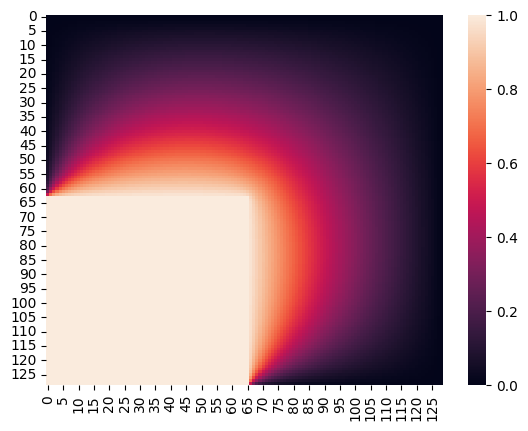

In [144]:
# test the capacitance extraction function
nx = [2**i for i in range(3, 8)]
ny = [2**i for i in range(3, 8)]
a = 1.0
b = 1.0
c = 2.0
d = 2.0
cap = np.zeros(len(nx))
for i in range(len(nx)):
    cap[i] = capacitance(a, b, c, d, nx[i], ny[i], rel=2 - np.pi/nx[i], verbose=True)

In [145]:
from prettytable import PrettyTable
tab = PrettyTable(["n", "h [m]", "C [pF/m]"])
for row in zip(nx, a/np.array(nx), cap):
    tab.add_row(row)
print(tab)

+-----+-----------+--------------------+
|  n  |   h [m]   |      C [pF/m]      |
+-----+-----------+--------------------+
|  8  |   0.125   | 124.42974591941292 |
|  16 |   0.0625  | 89.13916690525464  |
|  32 |  0.03125  | 73.55071666894435  |
|  64 |  0.015625 | 66.28313764757317  |
| 128 | 0.0078125 | 62.78478558004716  |
+-----+-----------+--------------------+


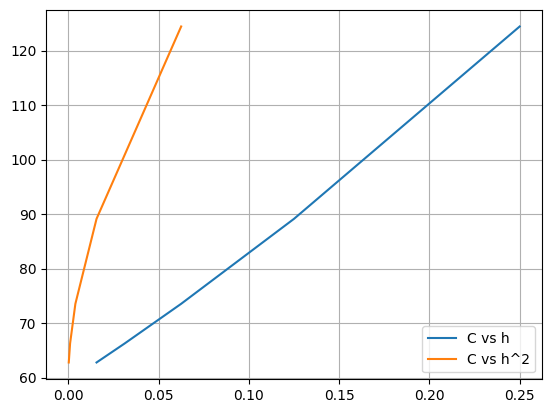

In [146]:
# plot Capacitance vs. h
plt.clf()
plt.plot(c/np.array(nx), cap, label='C vs h')
plt.plot((c/np.array(nx))**2, cap, label='C vs h^2')
plt.grid(True)
plt.legend()
plt.show()

## Finite Difference Derivatives of Complex Exponentials

Derivatives of odd order lead to bad results when computing the Laplace equation. To get good numerical results when using Finite Difference method on equation beholding odd order derivatives, another approach must be used.

### Fourier Series
All functions can be written as a sum of complex exponentials. The complex exponential is defined as:

$$e^{j\theta} = \cos(\theta) + j\sin(\theta)$$

Adapting the complex exponential to the set of problems Maxwell's equations are able to solve, and considering only a 1 dimension for simplification, the following entity can be defined and is of utmost importance:

$$ f(x) = e^{j k x} = \cos(k x) + j\sin(k x)$$ 

where $k$ is the wave number, defined as $k = \frac{2\pi}{\lambda}$, where $\lambda$ is the wavelength. The wave number is the number of waves per unit length. This function $f$ is an harmonic function that can be used to solve wave propagation problems in any domain.

The wavenumber $k$ can be restricted to $|kh|\leq \pi$ so that any harmonic function $f$ represented in a domain with a grid spacing of $h$ remains exactly the same at any grid point when shifted by any integer multiple of $2 \pi$ inside the domain, so that $kh \ \in \ [-\pi, \pi]$.

The set of complex exponentials belonging to the family described above are eigenfunctions of the derivative operator 

$$ \frac{\partial}{\partial x} e^{j k x} = j k e^{j k x}$$


Derivative operators can be described as $D^n = \frac{f^n}{f}$, where $n$ is the order of the derivative. For the case of the defined complex exponential, the derivative operator can be written as:

$$ D_x^n e^{j k x} = \frac{\partial^n}{\partial x^n} e^{j k x} = (j k)^n e^{j k x}$$

Giving:

$$ D_x^n = (j k)^n$$


This tells us 3 things:
1. that when solving a Maxwell's equation problem, extending possible solution functions to the complex domain will allow us to solve the problem for each individual frequency that satisfies the boundary conditions of the problem,
2. that the derivative operator is a linear operator that is transformed into a multiplying coefficient when solving the equation by extending the solutions to the complex domain, greatly simplifying the problem of finding exact solutions to Maxwell's equations
3. Greater precision can be obtained for odd order derivatives once the derivative operator is transformed into a multiplying coefficient.

### Full-Grid Finite Difference application to the Derivative Operator
Considering now a grid of points $x_i$ with a spacing $h$ between them, the complex exponential can be evaluated at each point of the grid:

$$ x_i = i h, \ i \in \Zeta $$

Considering now that our aim is to discover the wave number of the solutions that satisfy the problem, which essentially means that we aim to find which monocromatic waves are present in the solution, we can extend the Finite Difference method to the complex domain:

$$ D_x = \frac{f'(x_i)}{f(x_i)} = \frac{f (x_i + h) - f (x_i - h)}{2 h f (x_i)} = \frac{e^{jkh} - e^{-jkh}}{2 h} = j \frac{\sin(kh)}{h} $$

Considering now the linearization of the derivative operator, we have that: 

$$ D_x = jk = j\frac{\sin(kh)}{h} $$

Giving the effective numerical solution of the wave number in the selected domain grid:

$$ k_{num}^{two-cell} = \frac{\sin(kh)}{h} = k \left( 1 - \frac{k^2 h^2}{6} + ... \right) $$

Notice that when applying the Finite Difference method to the Derivative operator, function $f$ was differentiated in the range of $[x_i - h; x_i + h]$, and thus this numerical solution is the solution holding a relative error of $ \epsilon = - \frac{k^2 h^2}{6} $ for a two-cell grid range. Notice that the relative error increases with decreasing wavelength of the wave $\lambda = 2 \pi / k$ and with increasing grid spacing $h$.

### Staggered Grid (or Half-Grid) Finite Difference application to the Derivative Operator
The previously presented method presents a relatively high numerical relative error. Using the staggered grid method to evaluate the derivative operator at a half step between each point of the discrete domain, this error can be further reduced when applying Finite Difference method to the complex domain:

$$ D_x = \frac{f'(x_i)}{f(x_i)} = \frac{f (x_i + h) - f (x_i)}{2 h f (x_i + h/2)} = \frac{e^{jkh/2} - e^{-jkh/2}}{h} = j \frac{2\sin(kh/2)}{h} $$

Considering now the linearization of the derivative operator, we have that: 

$$ D_x = jk = j\frac{2\sin(kh/2)}{h} $$

Giving the effective numerical solution of the wave number in the selected domain grid:

$$ k_{num}^{staggered} = 2\frac{\sin(kh/2)}{h} = k \left( 1 - \frac{k^2 h^2}{24} + ... \right) $$

Notice now that when applying the Finite Difference method to the Derivative operator, function $f$ was differentiated in the range of $[x_i; x_i + h]$, and thus this numerical solution is the solution holding a relative error of $ \epsilon = - \frac{k^2 h^2}{24} $ for a single cell grid range. This method effectively reduces the produced numerical error by a factor of 4 when compared to the previous method.

### An example: First-order propagation equation using Finite-Difference Method

$$ f' = j\lambda f, \ x > 0, \ f(0) = 1$$

Using the finite difference method to solve for f, we can observe that: 

$$ \frac{f(x_{i+1}) - f(x_{i-1})}{2h} = j \lambda f(x_i)$$

Extending the normalized problem to the complex domain, and considering the full-grid method, we can easily observe that one solution to this equation will be $f(x) = e^{jkx}$ with $k_{num}^{two-cell} = \lambda$.

Because $f$ is an harmonic function and is periodic in $[-\pi, \pi[$, two solutions can be found:

1. $k_{num}^{two-cell} = \lambda \rightarrow k_1 h = \sin ^{-1} (\lambda h )$
2. $k_{num}^{two-cell} = \lambda \rightarrow k_2 h = \pi - \sin ^{-1} (\lambda h ) = \pi - k_1 h$

### Revisiting the previous example: First-order propagation equation using Finite-Difference Method

Using now the staggered grid method for solving the 1st order equation:

$$ f' = j\lambda f, \ x > 0, \ f(0) = 1$$

We can observe that: 

$$ \frac{f(x_{i+1}) - f(x_i)}{h} = \frac{j \lambda}{2} \left[ f(x_{i+1}) + f(x_i) \right]$$

Once again, extending the normalized problem to the complex domain, and considering the full-grid method, we can easily observe that one solution to this equation will be $f(x) = e^{jkx}$ with $k_{num}^{staggered} = \lambda$.
This leads to the following relation for the numerical solution of the wave number:

$$ \lambda = 2 \frac{\sin (kh/2)}{h} $$

Because $f$ is an harmonic function and is periodic in $[-\pi, \pi[$, two solutions can be found:

1. $k_{num}^{two-cell} = \lambda \rightarrow k_1 h = 2\sin ^{-1} (\lambda h/2 )$
2. $k_{num}^{two-cell} = \lambda \rightarrow k_2 h = \pi - 2\sin ^{-1} (\lambda h/2 ) = \pi - k_1 h$

This method leads to a lower numerical error when compared to the previous method not using staggered grids. The error is defined by $\epsilon = k - k_1$, where $k$ can be analytically determined.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
# Observe relative error when using a 1st order derivative Finite Differences method:
K_MIN = 0.0
K_MAX = 1.0
MIN_EXP = 4
MAX_EXP = 14
Np = 2**MAX_EXP

# analytical solution:
kh_pi = np.linspace (K_MIN, K_MAX, Np)

# non-staggered grid solution:
k1h_pi_non_stag = np.sin(kh_pi * np.pi)/np.pi
# staggered grid solution
k1h_pi_stag = 2*np.sin(kh_pi * np.pi / 2)/np.pi

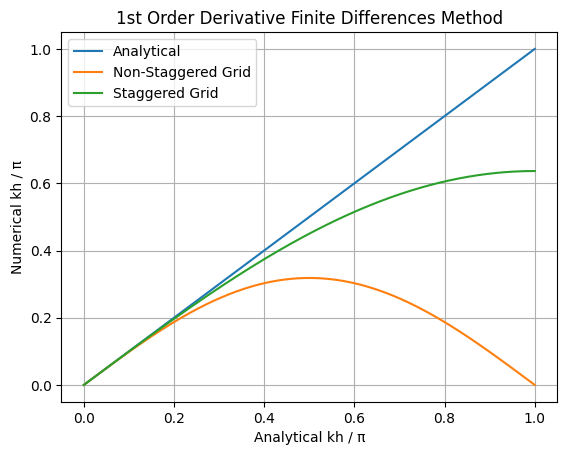

In [ ]:
# Plot the normalized numerical solutions against the normalized analytical solution:
plt.plot(kh_pi, kh_pi, label="Analytical")
plt.plot(kh_pi, k1h_pi_non_stag, label="Non-Staggered Grid")
plt.plot(kh_pi, k1h_pi_stag, label="Staggered Grid")
plt.title("1st Order Derivative Finite Differences Method")
plt.xlabel("Analytical kh / π")
plt.ylabel("Numerical kh / π")
plt.legend()
plt.grid(True)

In [ ]:
# Considering a staggered grid, let's obtain the value of kh for which the absolute error is less than 1%:
abs_err = np.abs(kh_pi*np.pi - k1h_pi_stag*np.pi)
target_kh = k1h_pi_stag[abs_err < (1 / 100)][-1] * np.pi
print("The target is kh < ", target_kh)
min_wavelength_h = int(np.ceil(2*np.pi / target_kh))
print("To guarantee less than 1% error, it is required at least: ", min_wavelength_h, " points per wavelength.")

The target is kh <  0.6122681445730526
To guarantee less than 1% error, it is required at least:  11  points per wavelength.


### Real life problem application

If we consider the problem of calculating the fields from a mobile telephone, at 900 MHz with λ = 33 cm, in a car of length 5 m, we see that the number of cells in one direction of the wave propagation problem domain required to get 1% phase (or frequency) error is at least 11 × 5 m / 0.33 m ≈ 167.

Of course that in a 3D simulation of a mobile phone network wave propagating in a car would require millions of cells, but the methods explored in this notebook allow us to know how to determine the minimum required number of cells in each dimension of the domain to achieve a given numerical error.

## Capacitance extraction problem revisited: Solving Laplace Equation with Finite Difference method in matricial form

It is possible to translate the problem of using the Laplace equation to compute the electric potential field to compute the capacitance of between the eletrodes of a coaxial cable to matricial form. In some cases, solving problems in the matricial problems can speed up the computation, trading the amount of computer memmory being used for computational speed: with higher RAM being used, you can also speed up calculations. This tradeoff can seem like a bad one, but when the expected computation time for a problem solving electromagnetics problems is something between 35 hours and a week, any speed up is welcome!

### Matricial Form of the Lapalce Equation:

Considering again the laplace equation for the potential, we have that:

$$ \nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} +  \frac{\partial^2 \phi}{\partial y^2} = 0$$

Using the Finite Difference method to discretise the problem once again, and considering $f_{i,j} = \phi(ih, jh)$ we arrive at the conclusion that:

$$ f_{i,j} - \frac{1}{4} \left( f_{i-1,j} + f_{i,j-1} + f_{i,j+1} f_{i+1,j} \right) = 0 $$

Again, this has already been show in the ```ch3_3_1_finite_diff.ipynb``` notebook.

This equation can be directly extrapolated to matricial form, considering the $f_{i,j}$ terms as the unknowns of the linear system. The previous equation is then traslated to:

$$ \left[ \frac{-1}{4} \ \frac{-1}{4} \ 1 \ \frac{-1}{4} \ \frac{-1}{4}  \right] \cdot \left[ f_{i-1,j} \ f_{i,j-1} \ f_{i,j} \ f_{i,j+1} \ f_{i+1,j} \right]^T = 0 $$

Taking the matricial form for each point $(ih,jh)$ of the grid:

$$ A_{i,j} \cdot \vec{f}_{i,j} = b_{i,j} = 0 $$

The matricial form presented above is a localised matricial form, implemented through the use of a sub-group of elements belonging to the full matrix of stacked unknown electric potential values:

$$ \vec{f} = \left[ f_{1,1} \ f_{1,2} \ ... \ f_{1,N_y} \ f_{2,1} \ ... \ f_{N_x, N_y} \right]^T $$

To use the full stacked unknown electric potential vector, the matrix $A$ must also be extended by stacking the rows corresponding to the application of the Finite Difference method format of the Laplace equation: 

$$ 
A = \left[ \begin{matrix}
1 & -1/4 & 0 & 0 & ... \\
-1/4 & 1 & -1/4 & 0 & ... \\
0 & -1/4 & 1 & -1/4 & ... \\
0 & 0 & -1/4 & 1 & ...\\
... & ... & ... & ...
\end{matrix} \right]
$$

This leads to the full matrix form of the problem, where the vector $\vec{f}$ is updated in each iteration of the problem to converge to the target solution:

$$ \vec{0} = \vec{b} = A \cdot \vec{f} $$

It is also important ot notice that most of the elements of the matrix $A$ are zero - the matrix is sparse. This means that the matrix can be stored in a more efficient way, and that the computation of the matrix-vector product can be sped up by using the sparse matrix-vector product algorithm.

In [ ]:
# Import required libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns

In [ ]:
# Setup the domain of the problem
domain_bb = ((0,0),(1,1))
NP = 20
domain_np = (NP+1, NP+1)

x, y = np.meshgrid(
    np.linspace(
        domain_bb[0][0], 
        domain_bb[1][0], 
        domain_np[0]
    ), 
    np.linspace(
        domain_bb[0][1], 
        domain_bb[1][1], 
        domain_np[1]
    )
)

cond_bb = ((0.3,0.3),(0.7,0.7))
cond_np = (NP+1,NP+1)

xcond, ycond = np.meshgrid(
    np.linspace(
        cond_bb[0][0], 
        cond_bb[1][0], 
        cond_np[0]
    ), 
    np.linspace(
        cond_bb[0][1], 
        cond_bb[1][1], 
        cond_np[1]
    )
)

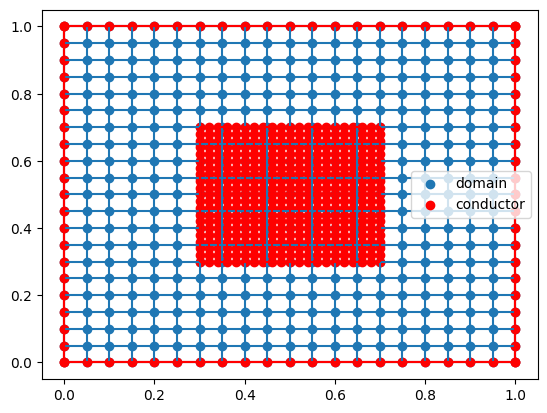

In [ ]:
# Observe the domain
plt.scatter(x, y, label='domain')
plt.scatter(xcond, ycond, label='conductor', color='red')
# paint the border red as it is the conducting boundary
plt.scatter(x[0], y[0], color='red')
plt.scatter(x[-1], y[-1], color='red')
plt.scatter(x[:,0], y[:,0], color='red')
plt.scatter(x[:,-1], y[:,-1], color='red')
segs1 = np.stack((x,y), axis=2)
seg1cond = np.stack((xcond,ycond), axis=2)
segs2 = segs1.transpose(1,0,2)
seg2cond = seg1cond.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(seg1cond, color='red'))
plt.gca().add_collection(LineCollection(segs2))
plt.gca().add_collection(LineCollection(seg2cond, color='red'))
# Boundary conductor
plt.gca().add_collection(LineCollection([segs1[0], segs1[-1], segs1[:,-1], segs1[:,0]], color='red'))
plt.gca().add_collection(LineCollection([seg1cond[0], seg1cond[-1], seg1cond[:,-1], seg1cond[:,0]], color='red'))
plt.gca().add_collection(LineCollection([segs2[0], segs2[-1], segs2[:,-1], segs2[:,0]], color='red'))
plt.gca().add_collection(LineCollection([seg2cond[0], seg2cond[-1], seg2cond[:,-1], seg2cond[:,0]], color='red'))
plt.legend()
plt.show()

In [ ]:
# Compute capacitance by updating the domain using the matricial formulation of the problem

def gauss_integral(f, n, m, hx, hy):
    """Compute the closed integral of f over the integration path."""
    integ = 0.0
    # integrate along the upper boundary
    for i in range(0, n):
        integ += 0.5*( f[i,m] + f[i+1,m] )
    # integrate along the right boundary
    for j in range(0, m):
        integ += 0.5*( f[n,j] + f[n,j+1] )
    
    # 4 symmetric quadrants
    return 4*integ
        
# FIXME: The method is not properly implemented!

def capacitance(
    a: float,
    b: float,
    c: float,
    d: float,
    nx: int = 10,
    ny: int = 10,
    inner_cond_volt: float = 1.0,
    outter_cond_volt: float = 0.0,
    tol: float = 1e-4,
    max_iter: int = 2**10,
    verbose: bool = False
):
    """Compute the capacitance 
    per unit length of a coaxial 
    cable pair of rectangle conductors.

    Args:
        a (float): inner conductor width
        b (float): inner conductor height
        c (float): outter conductor width
        d (float): outter conductor height
        nx (int): number of points in the horizontal direction
        ny (int): number of points in the vertical direction
        inner_cond_volt (float, optional): voltage of the inner conductor. Defaults to 1.0.
        outter_cond_volt (float, optional): voltage of the outter conductor. Defaults to 0.0.
        tol (float, optional): relative tolerance for Gauss Seidel iteration. Defaults to 1e-6
        rel (float): relaxation parameter. Defaults to 2 - np.pi/n.
        max_iter (int, optional): maximum number of iterations. Defaults to 2**10.
    """
    hx = 0.5*c/nx
    hy = 0.5*d/ny
    na = round(0.5*a/hx)
    nb = round(0.5*b/hy)
    # linear spaces are only created for 
    # the top right quadrant of the whole domain, once 
    # we're assuming symmetry in the x and y directions
    x = np.linspace(0, 0.5*c, nx+1)
    y = np.linspace(0, 0.5*d, ny+1)
    
    # create A matrix for the linear system iteration
    center_diag = np.ones((nx+1) * (ny+1))
    top_diag = np.ones((nx+1) * (ny+1)) * -0.25
    bot_diag = np.ones((nx+1) * (ny+1)) * -0.25
    A = sp.sparse.diags(
        diagonals=[center_diag, top_diag, bot_diag],
        offsets=[0, 1, -1],
        shape=((nx+1) * (ny+1), (nx+1) * (ny+1)),
        format='csr'
    )
    #print(A)
    
    # create b vector for the linear system iteration
    b = np.zeros_like(center_diag)
    
    # boundary conditions
    pot = np.zeros((nx+1, ny+1))
    # mask of the conductor region, signaling one
    # volt on the inner conductor
    pot[0:na+2, 0:nb+2] = inner_cond_volt
    pot[0:nx+2, -1] = outter_cond_volt
    pot[-1, 0:ny+2] = outter_cond_volt
    # mask of the vacuum region, signaling one 
    # on the vacuum region and zero on the conductors regions
    #mask = np.ones((nx+1, ny+1))
    #mask[0:na+2, 0:nb+2] = 0
    
    # the number of eigenvalues to compute is the number of points in the domain 
    # minus the number of points in the conductor region set to a fixed value
    num_eigenvalues = (nx+1)*(ny+1) - (na+2)*(nb+2)
    
    # flatten the pot matrix into a vector  from 1,1 to 1,nx, ... , ny,1 to ny,nx
    f_vec = pot.flatten()
    #f_vec_mask = mask.flatten()
    
    # The system is of the form A*f = 0 (Homogeneous Linear System Equation), 
    # as such, compute the eigenvalues of A 
    # and check if the system is well conditioned
    cap = 0.0
    eig_vals, eig_vecs = sp.sparse.linalg.eigs(
        A, which='SM', return_eigenvectors=True,
        v0=f_vec, tol=tol, maxiter=max_iter
    )
    #print(eig_vals)
    #print(eig_vecs)
    
    # the solution is the sum of the eigenvalues times the eigenvectors
    sol = np.zeros_like(f_vec)
    caps = []
    # observe all solutions
    #fig, ax = plt.subplots((len(eig_vecs) + 1)//2, 2, figsize=(10, 10))
    for i in range(eig_vecs.shape[1]):
        sol = (eig_vecs[:,i].astype(float)*eig_vals[i]).astype(float)
        # reshape the C-style flattened vector into a matrix
        pot = sol.reshape((nx+1, ny+1))
        # compute charge per unit length using gauss theorem
        q = gauss_integral(pot, nx-1, ny-1, hx, hy)
        cap = q/(inner_cond_volt - outter_cond_volt)
        # compute cap in pF/m = 1e12*epsilon_0 = 8.854187
        cap = cap*8.854187
        caps.append(cap)
        if verbose:
            #plt.clf()
            #sns.heatmap(pot, ax=ax[i//2, i%2])
            pass
    return caps

In [ ]:
# test the capacitance extraction function
nx = 128
a = 1.0
b = 1.0
c = 2.0
d = 2.0
cap = 0.0
cap = capacitance(a, b, c, d, nx, nx, verbose=True, max_iter=2**10)
print(f'Capacitance: {cap} pF/m')

Capacitance: [-12.666320763316287, -0.49884424843665714, -1.1581729189536105, -0.09448569565199288, 0.3228637956328297, 0.24772973614659505] pF/m


/var/folders/vv/xctyh4bd2td6k2w_gvh_t2vr0000gn/T/ipykernel_21854/3769446510.py:109: ComplexWarning: Casting complex values to real discards the imaginary part
  sol = (eig_vecs[:,i].astype(float)*eig_vals[i]).astype(float)
